In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
toys = pd.read_json('Toys_and_Games_5.json', lines=True)

In [10]:
toys

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0439893577,"[0, 0]",5,I like the item pricing. My granddaughter want...,"01 29, 2014",A1VXOAVRGKGEAK,Angie,Magnetic board,1390953600
1,0439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,Candace,it works pretty good for moving to different a...,1395964800
2,0439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,capemaychristy,love this!,1359331200
3,0439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,dcrm,Daughters love it,1391817600
4,0439893577,"[1, 1]",4,I have a stainless steel refrigerator therefor...,"05 5, 2014",ACCH8EOML6FN5,DoyZ,Great to have so he can play with his alphabet...,1399248000
5,0439893577,"[0, 0]",3,this is a nice magnetic board for the kids to ...,"05 16, 2013",A1EDPGHC9EYBUN,kp,grandma,1368662400
6,0439893577,"[0, 0]",3,This is just as I expected. It's not too sturd...,"12 26, 2012",A181ZNB42LISRZ,laura,Serves the purpose,1356480000
7,0439893577,"[1, 1]",5,My granddaughter really really likes this. I l...,"04 15, 2014",A1RBEJ5UQ1RWAW,Linda,Great,1397520000
8,0439893577,"[0, 0]",4,This is good product to have with unlimited po...,"03 28, 2013",AFGGC7SIV964O,Maan's Mom,A must have for any homeschooling classroom !,1364428800
9,0439893577,"[59, 59]",3,I keep this board on top of the hallway table ...,"11 19, 2009",A2XU46XXNV19C8,Margaret,Nifty little thing,1258588800


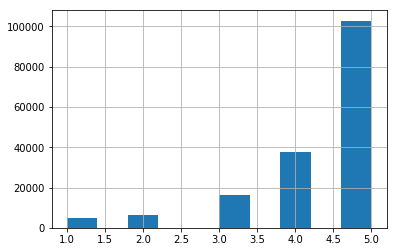

In [11]:
toys['overall'].hist()